In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [2]:
data = pd.read_csv("C:/Users/onkar/Downloads/4_may_prj/KNN_Project_5&6/KNN Assignment/bangalore house price prediction OHE-data.csv")
data.head(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = data.copy()
df.head(10)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,40.0,1170.0,2,3418.803419,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2.0,2.0,65.0,1425.0,3,4561.403509,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2.0,2.0,43.0,947.0,2,4540.654699,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2.0,2.0,36.0,1130.0,2,3185.840708,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2.0,2.0,76.0,1417.0,3,5363.443896,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855613,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print("Cheking For missing values:")
df.isnull().sum()

Cheking For missing values:


bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [6]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

Saved the price distribution graph.


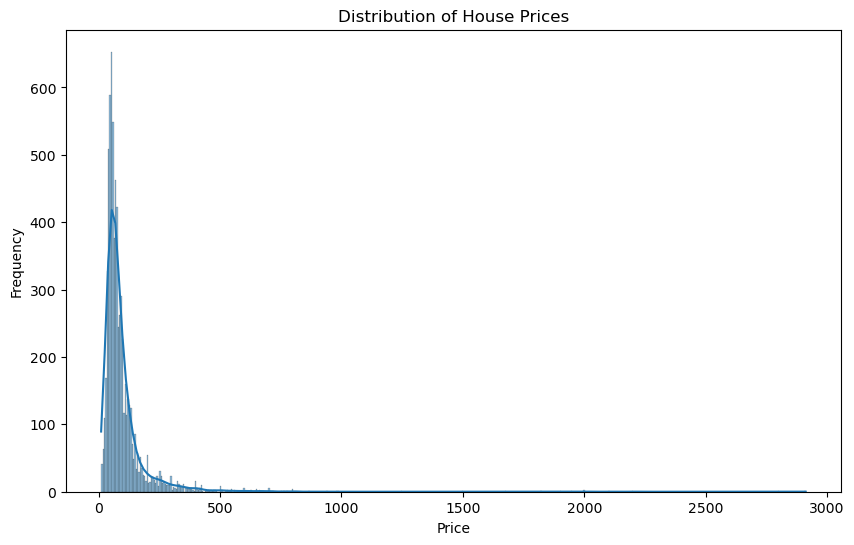

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('graphs/price_distributionPRJ6.png')
print("Saved the price distribution graph.")


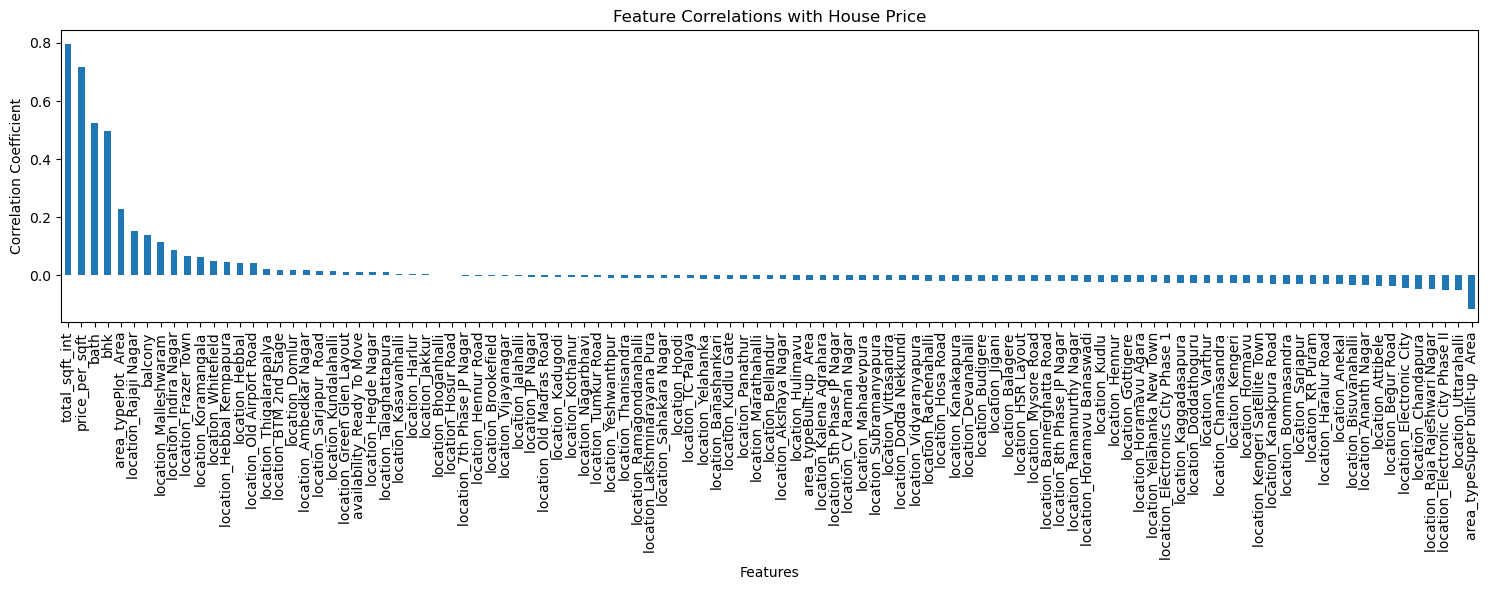

In [8]:
corelation_matrics = df.corr()
target_corr = corelation_matrics['price'].sort_values(ascending=False)
plt.figure(figsize=(15,6))
target_corr.drop('price').plot(kind='bar')
plt.title('Feature Correlations with House Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('graphs/feature_correlationsPRJ6.png')

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


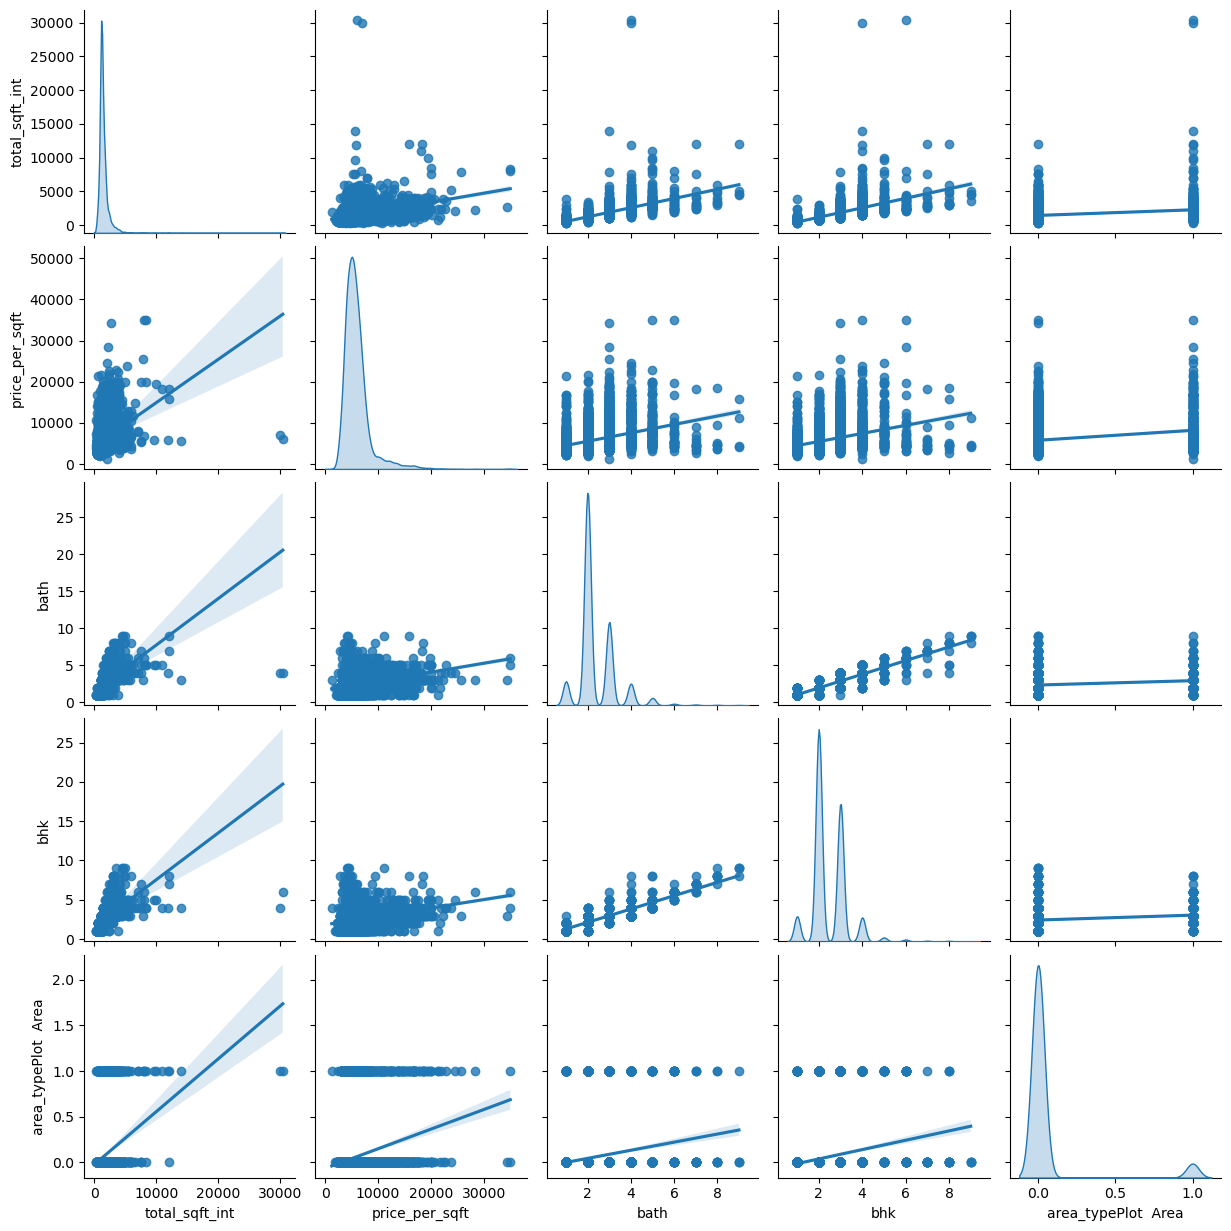

In [9]:
top_feature = target_corr.index[1:6]
sns.pairplot(df, vars = top_feature, kind='reg',diag_kind='kde')
plt.savefig('graphs/corr_pairplotPRJ6')

In [11]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df.drop('price', axis = 1))

X = scaled_feat
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [12]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)
print("KNN model trained successfully.")

KNN model trained successfully.


In [13]:
pred = model.predict(X_test)

In [14]:
r2 = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred)
mas = mean_absolute_error(y_test,pred)
print("The model evaluation:","\n nSqured:", r2, "\n nRMSE:",rmse,"\n nMAS:", mas)

The model evaluation: 
 nSqured: 0.8459631996816628 
 nRMSE: 1748.8028460182584 
 nMAS: 15.149543539325844
